## Obesity&DiabetesInNYC


This dataset is a subset of the PUBLIC USE 2020 NYC Community Health Survey

Analytic Codebook about code names and relevant questions: https://www.nyc.gov/assets/doh/downloads/pdf/episrv/chs2020-codebook.pdf

This subset consists of the following variables:

**cid:** Unique identifier across all years of CHS 

**strata:**	Stratification/nesting variable for analysis

**survey:**	Survey number

**birthsex:** Sex at birth (1-M, 2-F, Null: Don't know/Refused to answer )

**weightall:** BMI based (1-Under/Normal weight, 2-Overweight, 3-Obese)

**pov_rate:** Neighborhood poverty; percent of zip code population living below 100% FPL per American Community Survey, 2015-2019 (1-low, 2-med, 3-high, 4-v. high)

**fruitveg_servings_yest:** Total servings of fruit and/or vegetables eaten day before survey call (1: None, 2: 1 - 4, 3: 5+, Other=Don't know/Refused )

**avg_soda_perday:** Avg number of sodas per day (1-None, 2-<1,3-1,4->1, Other-don't know/refused)

**two_plus_soda:** Do you drink two or more sodas per day (1-<=2. 2->2, Other- don't know/refused)

**nsugar_drink_perday:** Number of soda and other sugar sweetened beverages consumed. Standardized to per day (continuous) (Other-Don't know/Refused)

**soda+sweet_perday:** Average number of sodas plus sweetened drinks per day (categorical) (Other-Don't know/Refused)

**soda+sweet_yn:** Consumes one or more sugar sweetened beverages (soda + other sweetened drinks) on average per day(1-Yes, 2-No)

**skiprxcost:** In the past 12 months, have you put off filling a prescription, skipped taking a prescription, or reduced the amount of the prescription you took because of cost? (1-Yes, 2-No, Other- Refused/Don't know)

**ageatdiabetes:** How old were you when you were first told you have diabetes? (1:<18,2:18-40,3:>40,Other-Refused/Dont know)

**diabcntrlmeds:** Are you taking pills to lower your blood sugar, or taking injectable drugs other than insulin to lower your blood sugar? (1-Yes, 2-No, 3-DK/RTA)

**diabetes20:** Have you ever been told by a doctor, nurse or other health professional that you have diabetes? (1-Yes, 2-No, Other-dk/rta)

**agegroup:** What is your age? (1:18-24, 2:25-44, 3:45-64, 4: 65+, Other-DK/RTA)

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [67]:
chs_df=pd.read_csv("https://raw.githubusercontent.com/Vakiti/Miigating-Nutritional-Disparities-In-New-York/data/CHC_Nutrition2020.csv")
chs_df

,cid,strata,survey,birthsex,weightall,pov_rate,fruitveg_servings_yest,avg_soda_perday,two_plus_soda,nsugar_drink_perday,soda+sweet_perday,soda+sweet_yn,skiprxcost,ageatdiabetes,diabcntrlmeds,diabetes20,agegroup,ageatdiabetes.1
0,2100001,20201407,21,2.0,1.0,3,2.0,1.0,2.0,1.000000,1.000000,1.0,2.0,NaN,NaN,2.0,4.0,NaN
1,2100002,20201304,21,2.0,1.0,3,2.0,1.0,2.0,0.285714,0.285714,2.0,2.0,3.0,1.0,1.0,4.0,3.0
2,2100003,20201502,21,2.0,2.0,1,2.0,1.0,2.0,0.000000,0.000000,2.0,NaN,NaN,NaN,2.0,3.0,NaN
3,2100004,20201314,21,2.0,1.0,2,2.0,2.0,2.0,0.033058,0.175915,2.0,NaN,1.0,1.0,1.0,2.0,1.0
4,2100005,20201210,21,2.0,3.0,2,2.0,2.0,2.0,0.000000,0.033058,2.0,2.0,NaN,NaN,2.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8776,2116976,20204000,21,1.0,1.0,2,2.0,1.0,2.0,0.000000,0.000000,2.0,NaN,NaN,NaN,2.0,1.0,NaN
8777,2116977,20204000,21,1.0,2.0,2,2.0,1.0,2.0,1.000000,1.000000,1.0,2.0,NaN,NaN,2.0,2.0,NaN
8778,2116978,20204000,21,2.0,2.0,2,3.0,1.0,2.0,0.000000,0.000000,2.0,2.0,NaN,NaN,2.0,3.0,NaN
8779,2116979,20204000,21,1.0,2.0,2,3.0,1.0,2.0,0.000000,0.000000,2.0,2.0,NaN,NaN,2.0,3.0,NaN


In [68]:
chs_df.drop('ageatdiabetes.1', axis=1, inplace=True)

In [69]:
print(chs_df.info())
chs_df.isna().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8781 entries, 0 to 8780
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cid                     8781 non-null   int64  
 1   strata                  8781 non-null   int64  
 2   survey                  8781 non-null   int64  
 3   birthsex                8752 non-null   float64
 4   weightall               8567 non-null   float64
 5   pov_rate                8781 non-null   int64  
 6   fruitveg_servings_yest  8610 non-null   float64
 7   avg_soda_perday         8753 non-null   float64
 8   two_plus_soda           8753 non-null   float64
 9   nsugar_drink_perday     8735 non-null   float64
 10  soda+sweet_perday       8734 non-null   float64
 11  soda+sweet_yn           8734 non-null   float64
 12  skiprxcost              5107 non-null   float64
 13  ageatdiabetes           1030 non-null   float64
 14  diabcntrlmeds           1086 non-null   

cid                          0
strata                       0
survey                       0
birthsex                    29
weightall                  214
pov_rate                     0
fruitveg_servings_yest     171
avg_soda_perday             28
two_plus_soda               28
nsugar_drink_perday         46
soda+sweet_perday           47
soda+sweet_yn               47
skiprxcost                3674
ageatdiabetes             7751
diabcntrlmeds             7695
diabetes20                  20
agegroup                    14
dtype: int64

In [70]:
# List of columns where missing values should be imputed
columns_to_impute = ['birthsex', 'weightall', 'pov_rate', 'fruitveg_servings_yest', 
                     'avg_soda_perday', 'two_plus_soda', 'nsugar_drink_perday', 
                     'soda+sweet_perday', 'soda+sweet_yn', 'skiprxcost', 'ageatdiabetes','diabcntrlmeds','diabetes20','agegroup']

# Impute missing values with 'DK' for 'Don't know' and 'RTA' for 'Refused to answer'
chs_df[columns_to_impute] = chs_df[columns_to_impute].fillna('99.99')

# Replace values in the 'birthsex' column
chs_df['birthsex'] = chs_df['birthsex'].map({1: 'M', 2: 'F'})

chs_df

,cid,strata,survey,birthsex,weightall,pov_rate,fruitveg_servings_yest,avg_soda_perday,two_plus_soda,nsugar_drink_perday,soda+sweet_perday,soda+sweet_yn,skiprxcost,ageatdiabetes,diabcntrlmeds,diabetes20,agegroup
0,2100001,20201407,21,F,1.0,3,2.0,1.0,2.0,1.0,1.0,1.0,2.0,99.99,99.99,2.0,4.0
1,2100002,20201304,21,F,1.0,3,2.0,1.0,2.0,0.285714,0.285714,2.0,2.0,3.0,1.0,1.0,4.0
2,2100003,20201502,21,F,2.0,1,2.0,1.0,2.0,0.0,0.0,2.0,99.99,99.99,99.99,2.0,3.0
3,2100004,20201314,21,F,1.0,2,2.0,2.0,2.0,0.033058,0.175915,2.0,99.99,1.0,1.0,1.0,2.0
4,2100005,20201210,21,F,3.0,2,2.0,2.0,2.0,0.0,0.033058,2.0,2.0,99.99,99.99,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8776,2116976,20204000,21,M,1.0,2,2.0,1.0,2.0,0.0,0.0,2.0,99.99,99.99,99.99,2.0,1.0
8777,2116977,20204000,21,M,2.0,2,2.0,1.0,2.0,1.0,1.0,1.0,2.0,99.99,99.99,2.0,2.0
8778,2116978,20204000,21,F,2.0,2,3.0,1.0,2.0,0.0,0.0,2.0,2.0,99.99,99.99,2.0,3.0
8779,2116979,20204000,21,M,2.0,2,3.0,1.0,2.0,0.0,0.0,2.0,2.0,99.99,99.99,2.0,3.0


In [71]:
chs_df['birthsex'] = chs_df['birthsex'].fillna('99.99')

In [72]:
chs_df.duplicated().sum()

0

In [73]:
chs_df.value_counts()

cid      strata    survey  birthsex  weightall  pov_rate  fruitveg_servings_yest  avg_soda_perday  two_plus_soda  nsugar_drink_perday  soda+sweet_perday  soda+sweet_yn  skiprxcost  ageatdiabetes  diabcntrlmeds  diabetes20  agegroup
2100001  20201407  21      F         1.0        3         2.0                     1.0              2.0            1.000000             1.000000           1.0            2.0         99.99          99.99          2.0         4.0         1
2114057  20202999  21      F         3.0        4         2.0                     3.0              2.0            0.000000             1.000000           1.0            2.0         99.99          99.99          2.0         2.0         1
2114051  20202411  21      M         3.0        1         2.0                     1.0              2.0            0.000000             0.000000           2.0            99.99       99.99          99.99          2.0         3.0         1
2114052  20202111  21      F         2.0        3        

In [74]:
# Convert non-integer values to float and round off to nearest whole number
chs_df['nsugar_drink_perday'] = chs_df['nsugar_drink_perday'].astype(float).round()

In [75]:
chs_df.isna().sum()

cid                       0
strata                    0
survey                    0
birthsex                  0
weightall                 0
pov_rate                  0
fruitveg_servings_yest    0
avg_soda_perday           0
two_plus_soda             0
nsugar_drink_perday       0
soda+sweet_perday         0
soda+sweet_yn             0
skiprxcost                0
ageatdiabetes             0
diabcntrlmeds             0
diabetes20                0
agegroup                  0
dtype: int64

In [76]:
# Import the required library
from scipy.stats import mode

# Define a function for mode imputation
def impute_mode(column):
    # Calculate the mode of the column
    mode_value = mode(column.dropna())[0][0]
    # Replace missing values with the mode
    column.fillna(mode_value, inplace=True)

# Apply mode imputation to the columns with missing values
cols_to_impute = ['ageatdiabetes', 'diabcntrlmeds', 'diabetes20', 'agegroup']
for col in cols_to_impute:
    impute_mode(chs_df[col])


C:\Users\vakit\AppData\Local\Temp\ipykernel_12048\626298157.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = mode(column.dropna())[0][0]
C:\Users\vakit\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\vakit\AppData\Local\Temp\ipykernel_12048\626298157.py:7: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://

In [77]:
chs_df.isna().sum()

cid                       0
strata                    0
survey                    0
birthsex                  0
weightall                 0
pov_rate                  0
fruitveg_servings_yest    0
avg_soda_perday           0
two_plus_soda             0
nsugar_drink_perday       0
soda+sweet_perday         0
soda+sweet_yn             0
skiprxcost                0
ageatdiabetes             0
diabcntrlmeds             0
diabetes20                0
agegroup                  0
dtype: int64

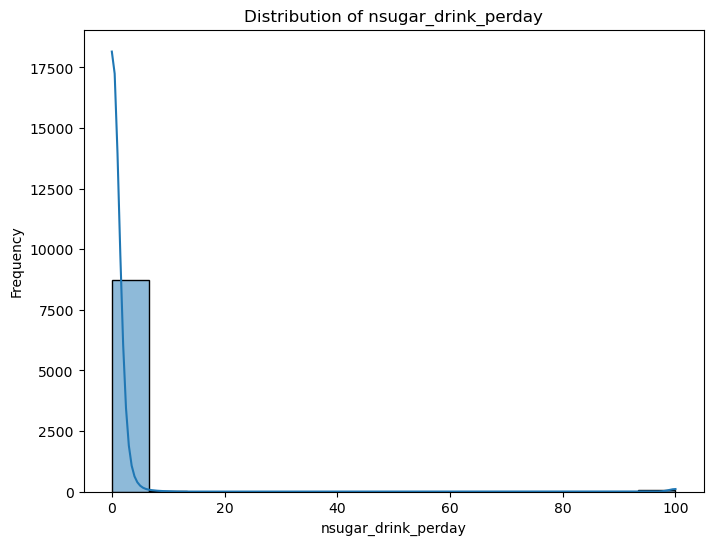

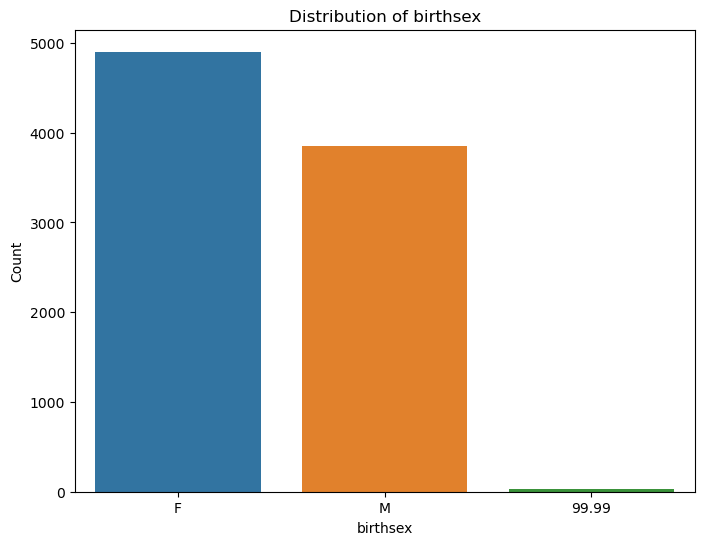

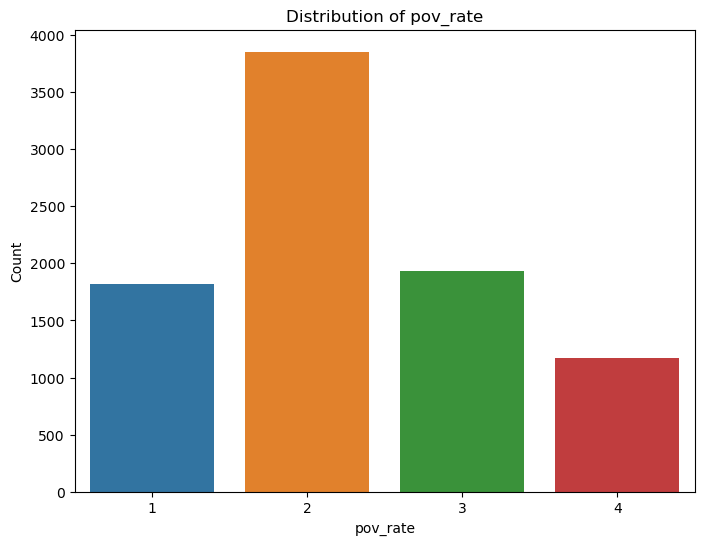

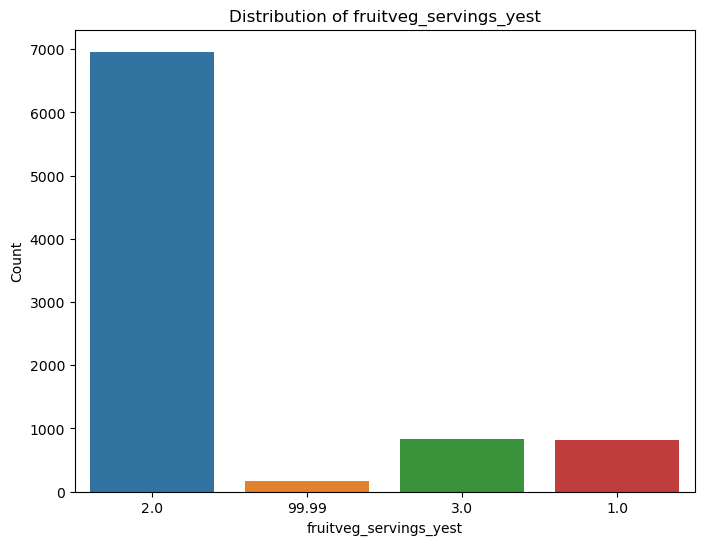

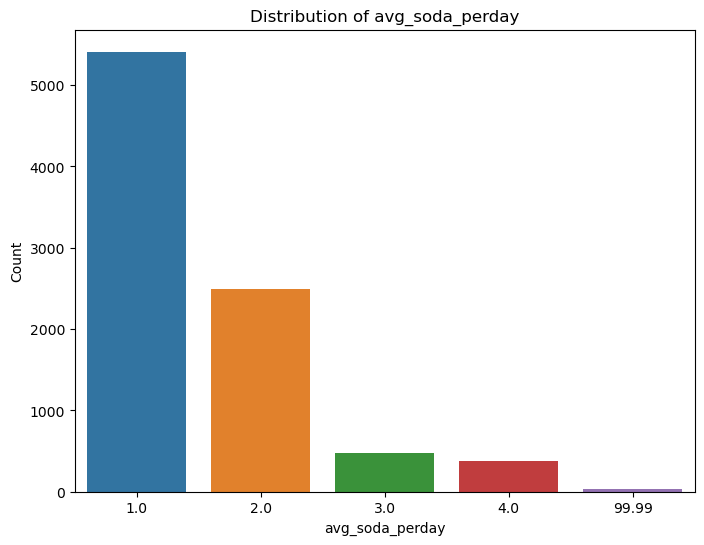

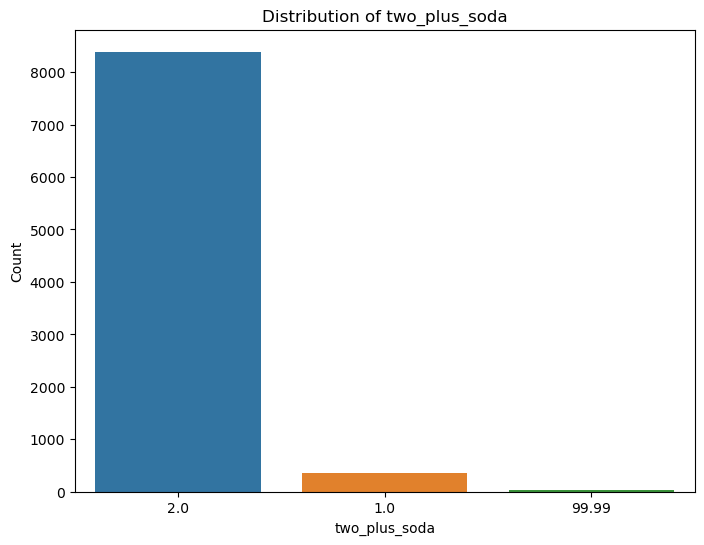

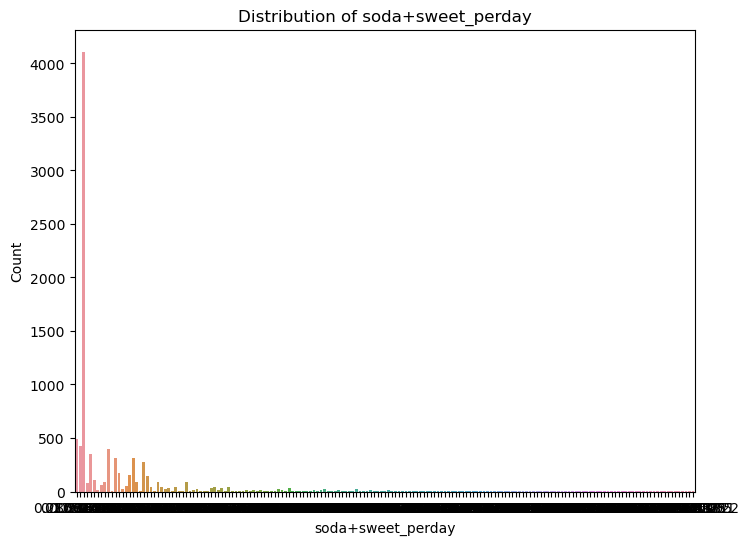

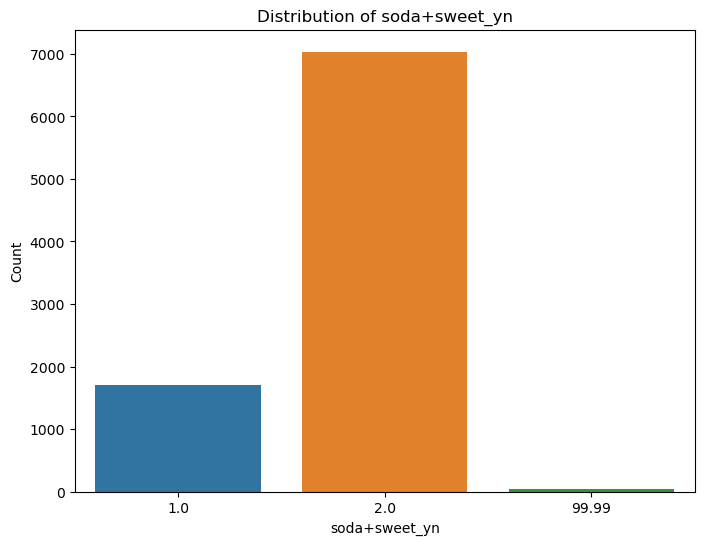

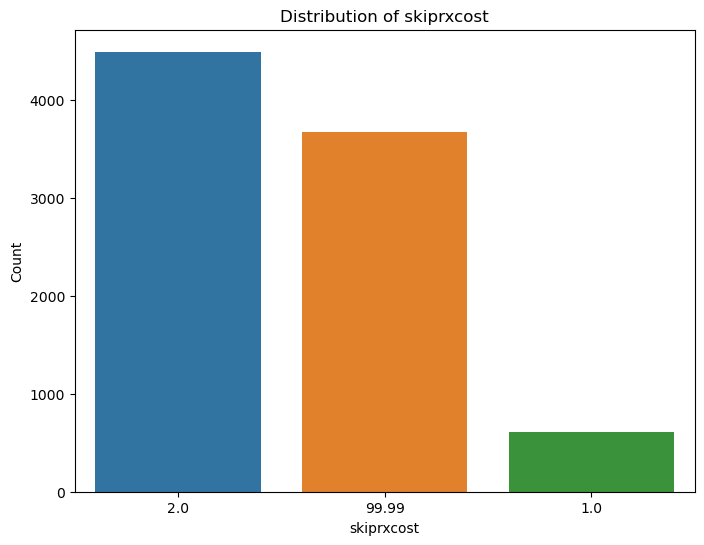

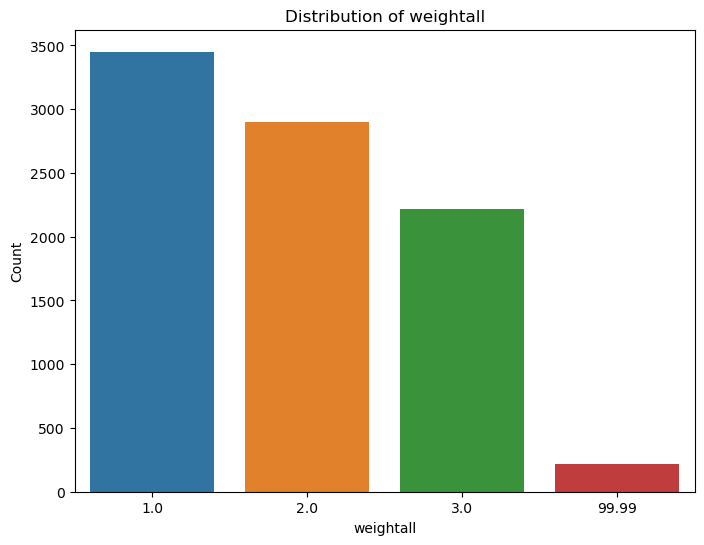

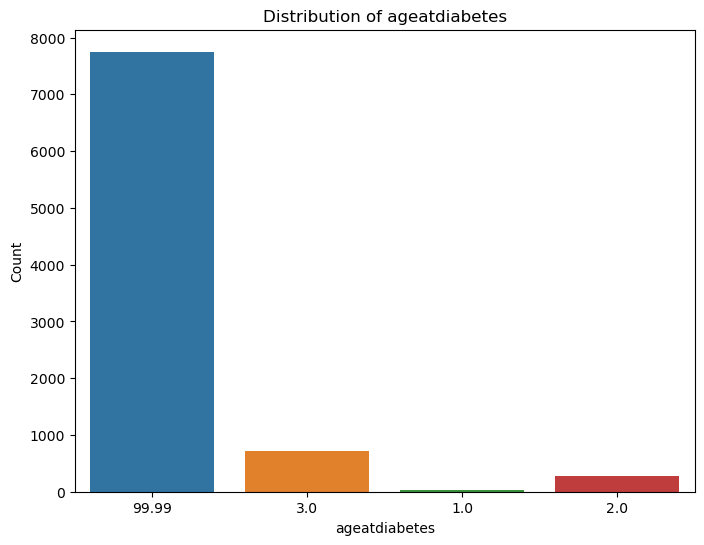

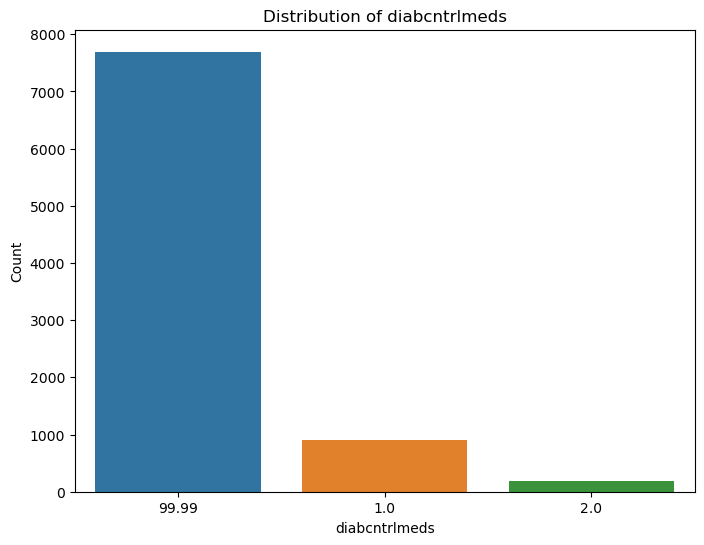

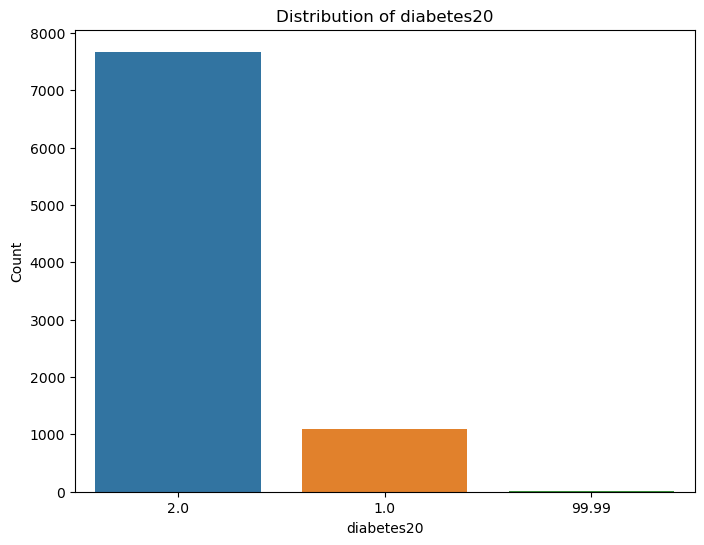

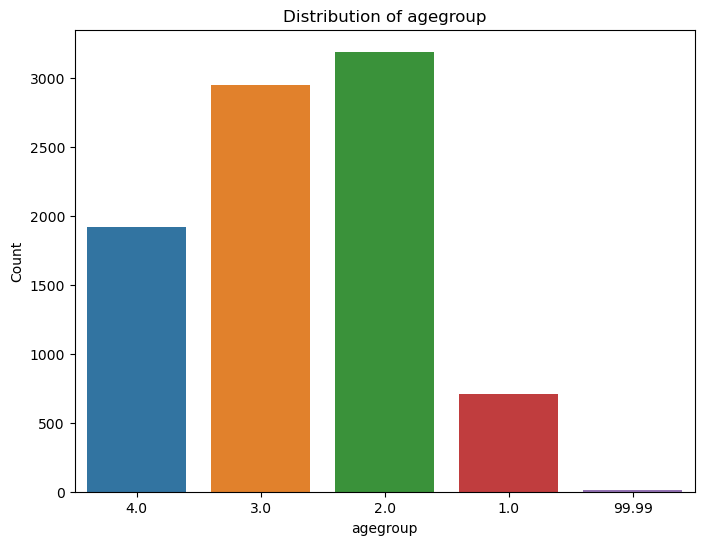

In [78]:
categorical_vars = ['birthsex', 'pov_rate', 'fruitveg_servings_yest', 'avg_soda_perday', 'two_plus_soda', 'soda+sweet_perday',
                    'soda+sweet_yn', 'skiprxcost', 'weightall', 'ageatdiabetes','diabcntrlmeds','diabetes20','agegroup']
numerical_vars = ['nsugar_drink_perday', ]

# Plot distributions of numerical variables
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(chs_df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Plot distributions of categorical variables
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=chs_df, x=var)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()


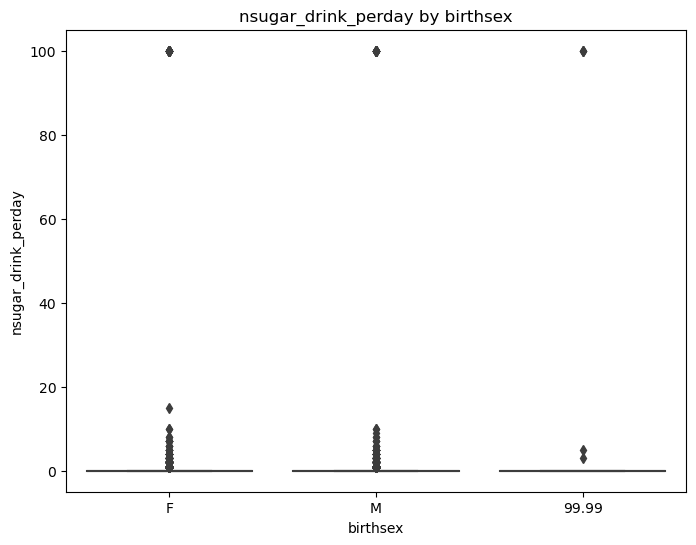

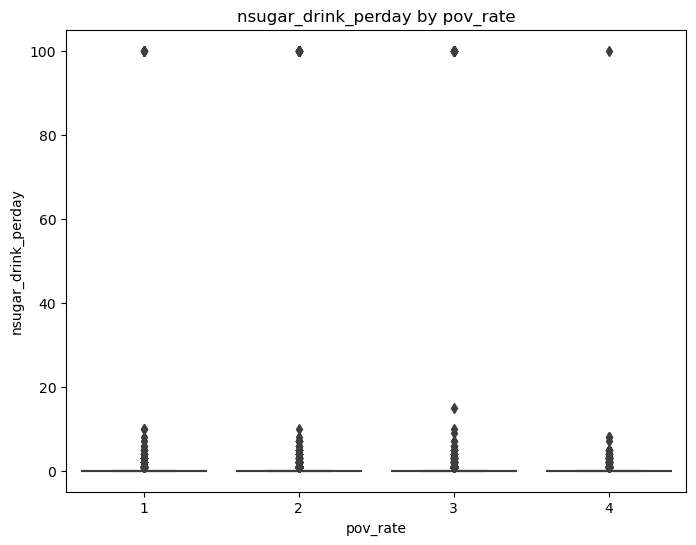

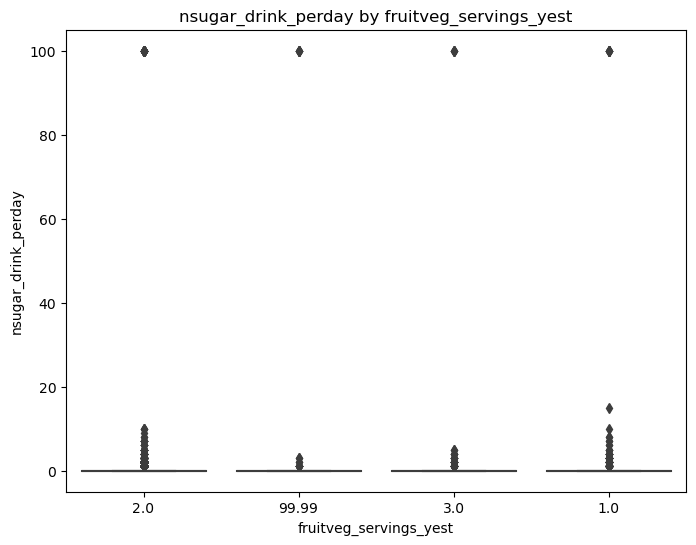

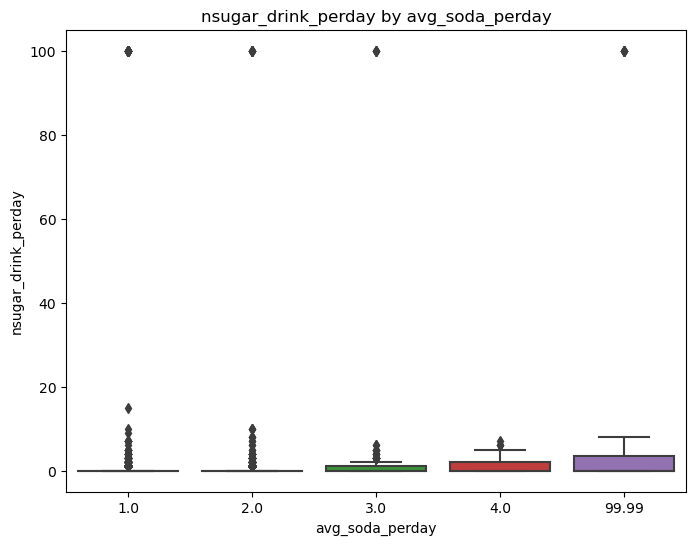

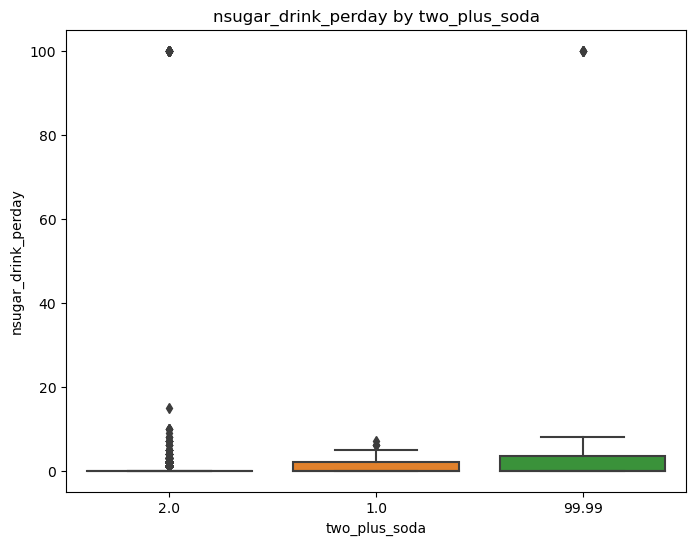

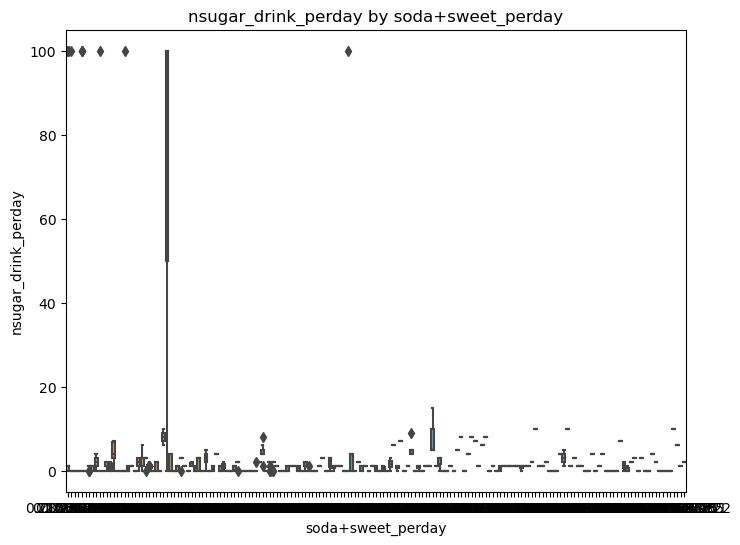

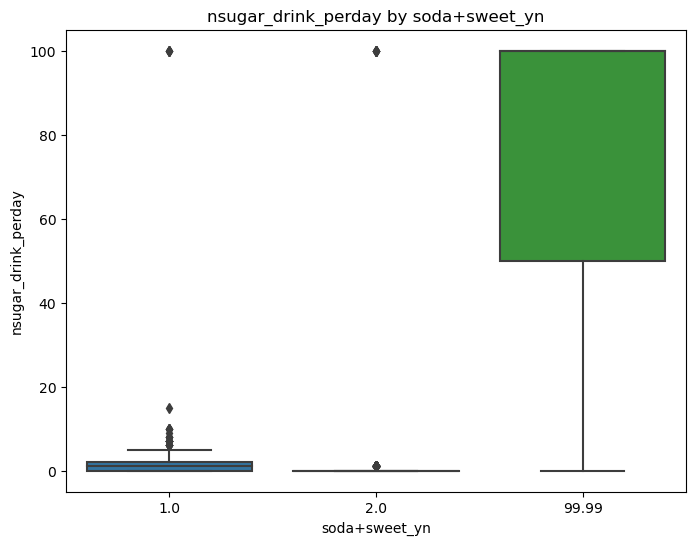

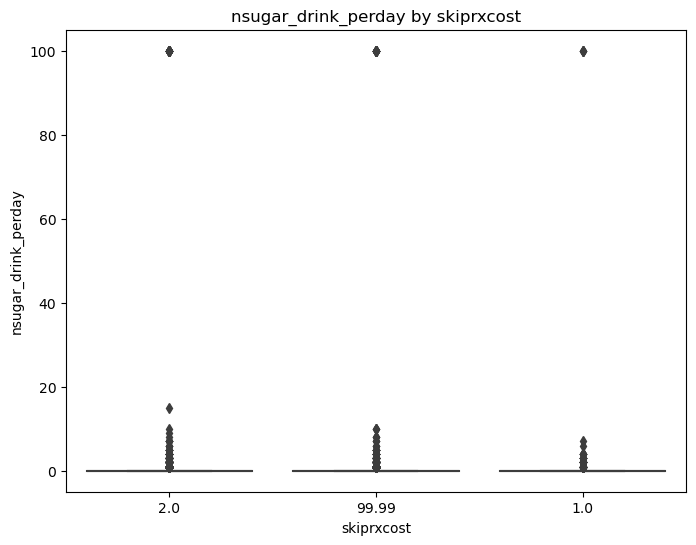

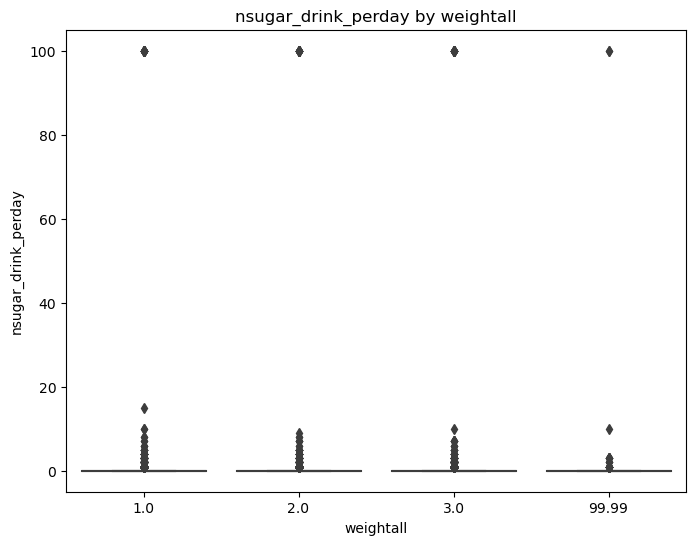

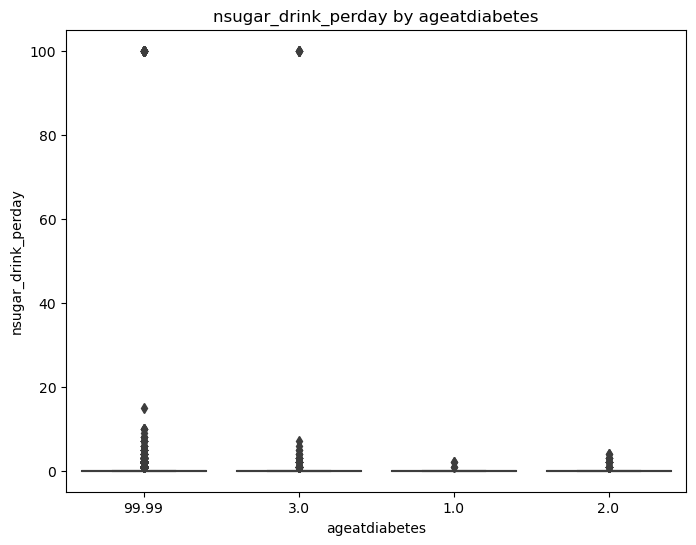

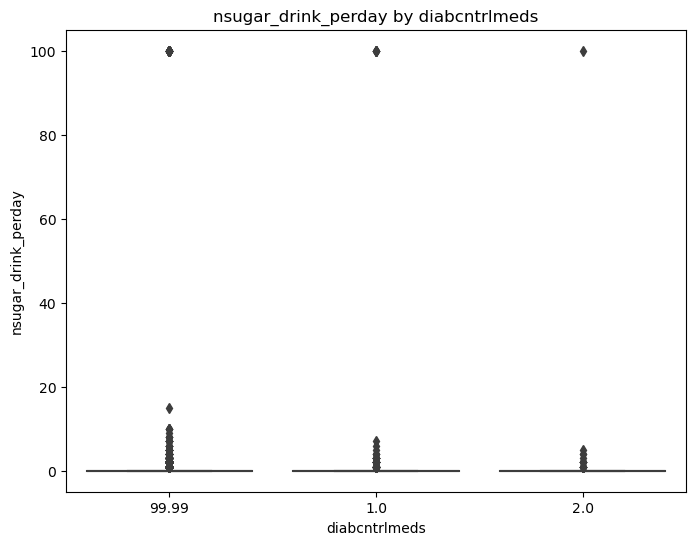

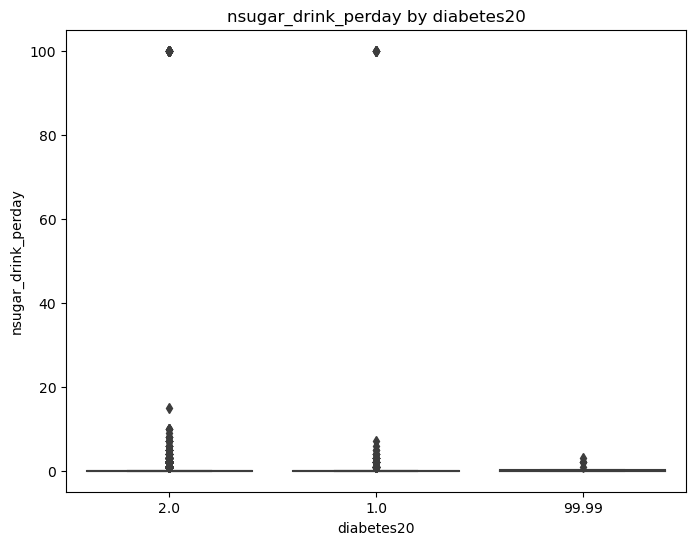

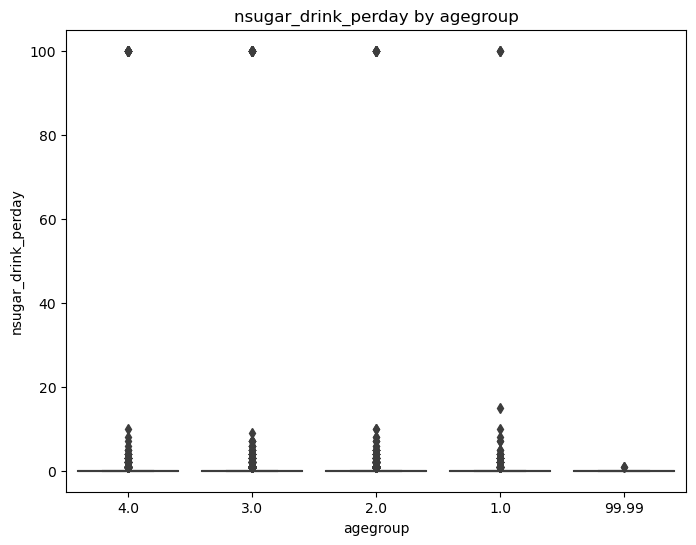

In [79]:

# Plot numerical variables against categorical variables
for num_var in numerical_vars:
    for cat_var in categorical_vars:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=chs_df, x=cat_var, y=num_var)
        plt.title(f'{num_var} by {cat_var}')
        plt.xlabel(cat_var)
        plt.ylabel(num_var)
        plt.show()

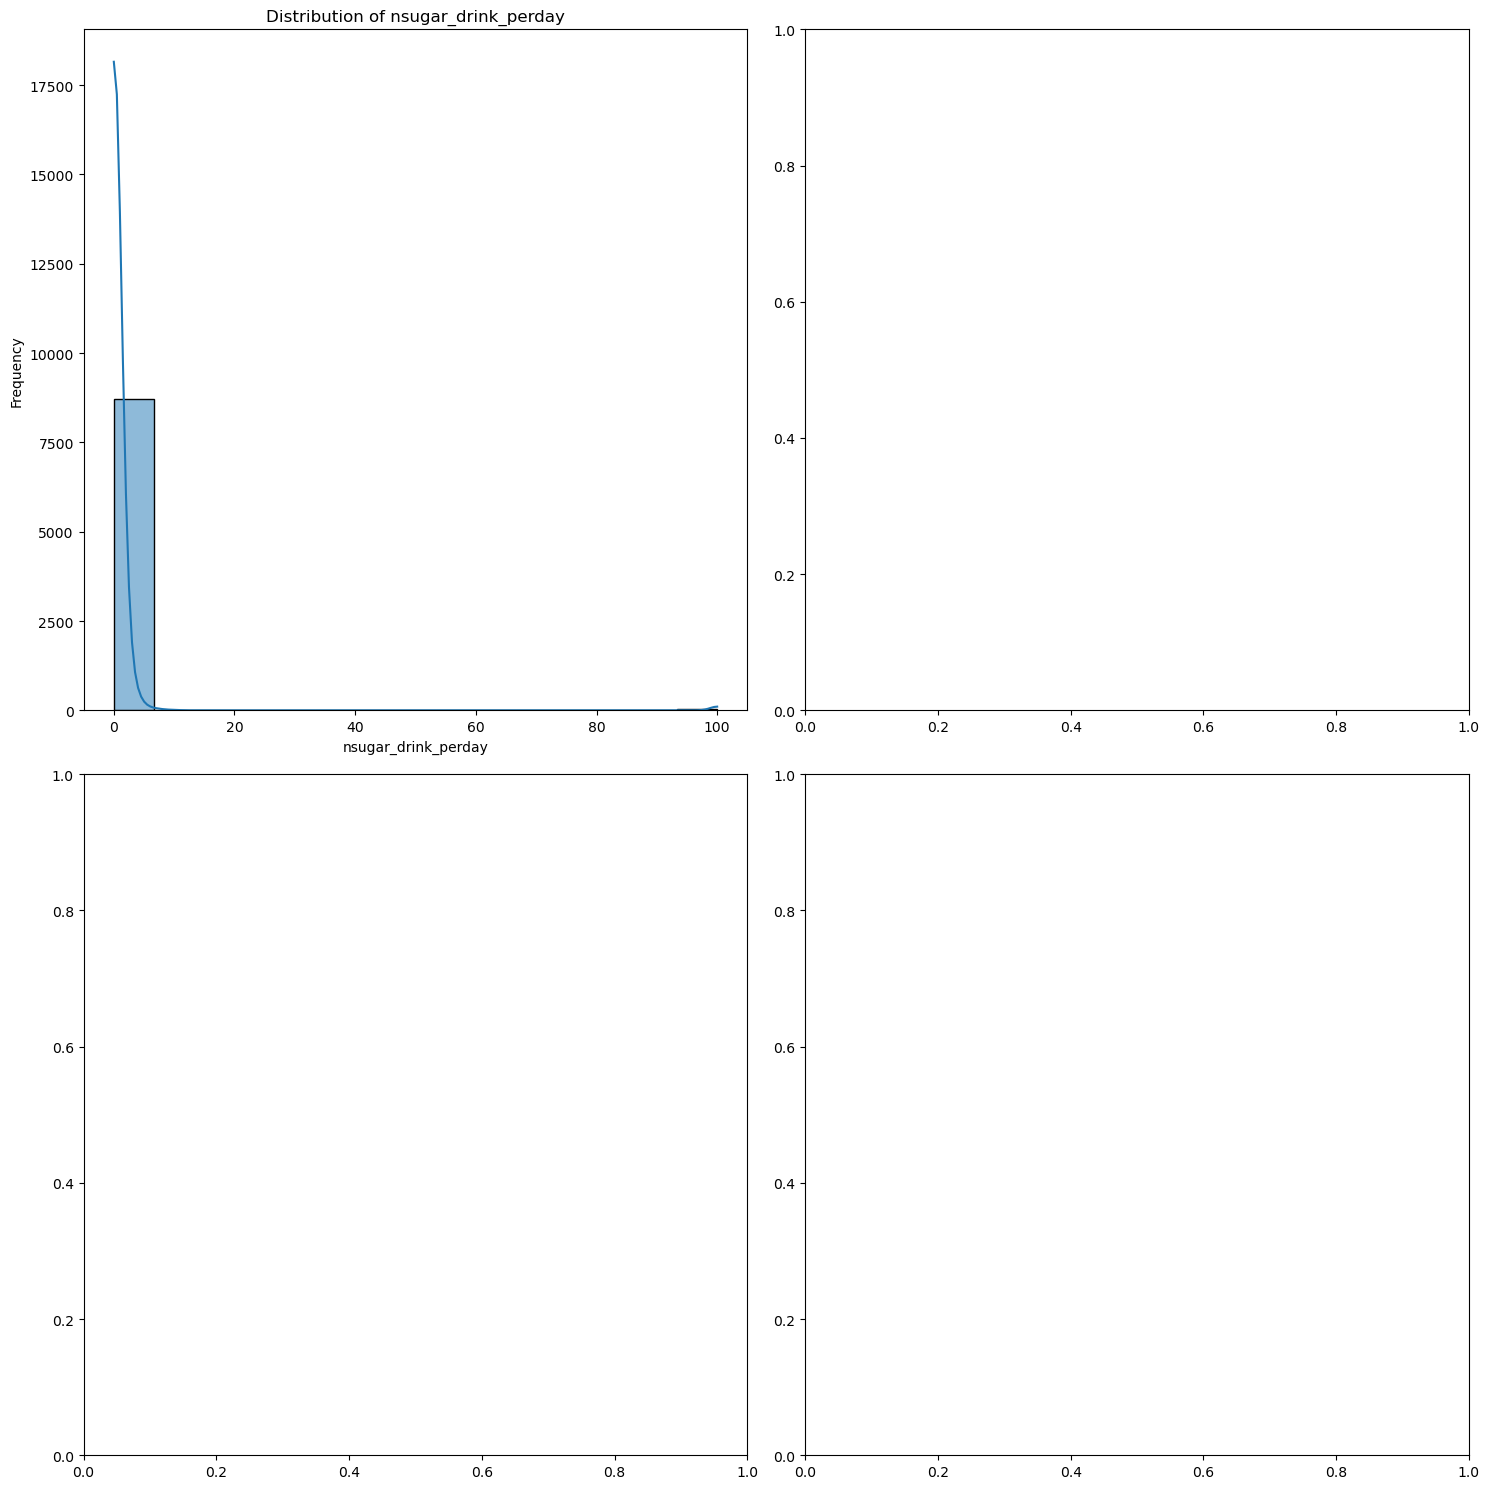

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Plot distributions of numerical variables
for i, var in enumerate(numerical_vars):
    row = i // 3
    col = i % 3
    sns.histplot(chs_df[var], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequency')



'''# Plot numerical variables against categorical variables
for i, num_var in enumerate(numerical_vars):
    for j, cat_var in enumerate(categorical_vars):
        ax = axes[j, i]
        sns.boxplot(data=chs_df, x=cat_var, y=num_var, ax=ax)
        ax.set_title(f'{num_var} by {cat_var}')
        ax.set_xlabel(cat_var)
        ax.set_ylabel(num_var)'''

plt.tight_layout()
plt.show()

### What is the distribution of BMI (weightall) in the dataset? Are there more people in the dataset with normal weight, overweight, or obesity?

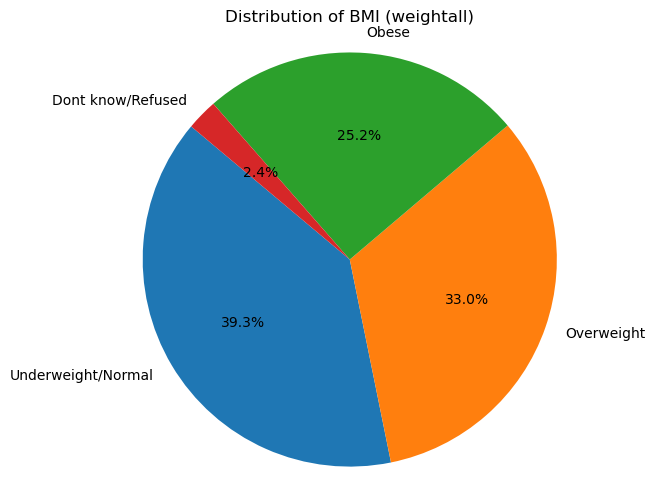

In [84]:
# Count the occurrences of each BMI category
bmi_counts = chs_df['weightall'].value_counts()

# Define labels for BMI categories
bmi_labels = ['Underweight/Normal', 'Overweight', 'Obese', 'Dont know/Refused']

# Plot a pie chart with custom labels
plt.figure(figsize=(8, 6))
plt.pie(bmi_counts, labels=bmi_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of BMI (weightall)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


### How does the distribution of fruit and vegetable servings (fruitveg_servings_yest) vary across different poverty rate levels (pov_rate)?

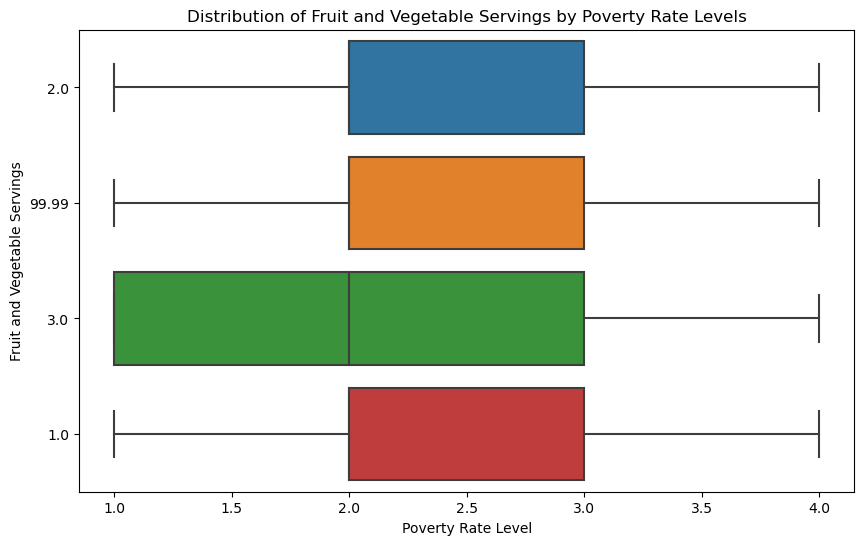

In [148]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=chs_df, x='pov_rate', y='fruitveg_servings_yest')
plt.title('Distribution of Fruit and Vegetable Servings by Poverty Rate Levels')
plt.xlabel('Poverty Rate Level')
plt.ylabel('Fruit and Vegetable Servings')

# Set x-axis tick labels
#plt.gca().set_xticklabels(['Less than low','Low', 'Low-Med', 'Medium', 'Med-High','High', 'High-v.high', 'Very High'])

# Set y-axis tick labels
#plt.gca().set_yticklabels(['None','5+', 'Dont_know/Refused', '1-4'])
plt.show()
           
#'Med-High','High', 'High-v.high', 'Very High'])



### What is the frequency of skipping prescription medication due to cost (skiprxcost) in the dataset? What percent of it are women?

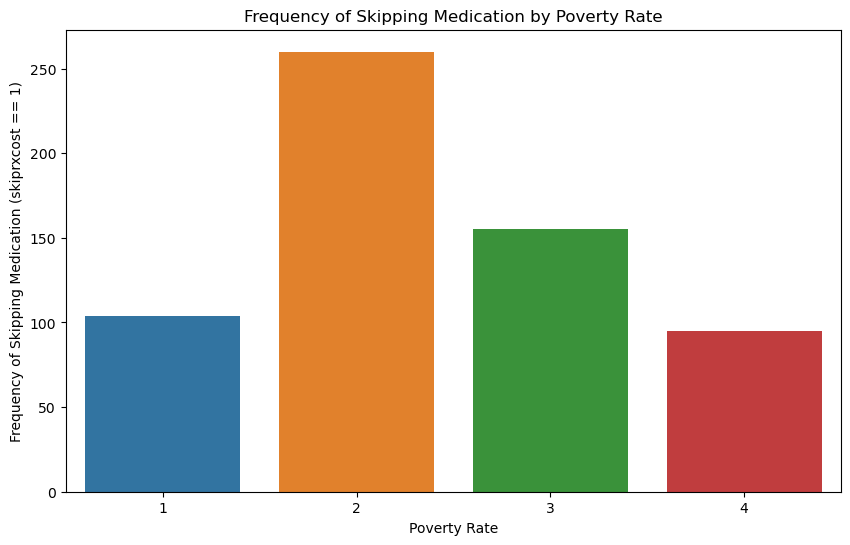

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by pov_rate and count the number of skiprxcost == 1
skiprxcost_counts = chs_df[chs_df['skiprxcost'] == 1].groupby('pov_rate')['skiprxcost'].count()

# Plot the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=skiprxcost_counts.index, y=skiprxcost_counts.values)
plt.title('Frequency of Skipping Medication by Poverty Rate')
plt.xlabel('Poverty Rate')
plt.ylabel('Frequency of Skipping Medication (skiprxcost == 1)')
plt.show()


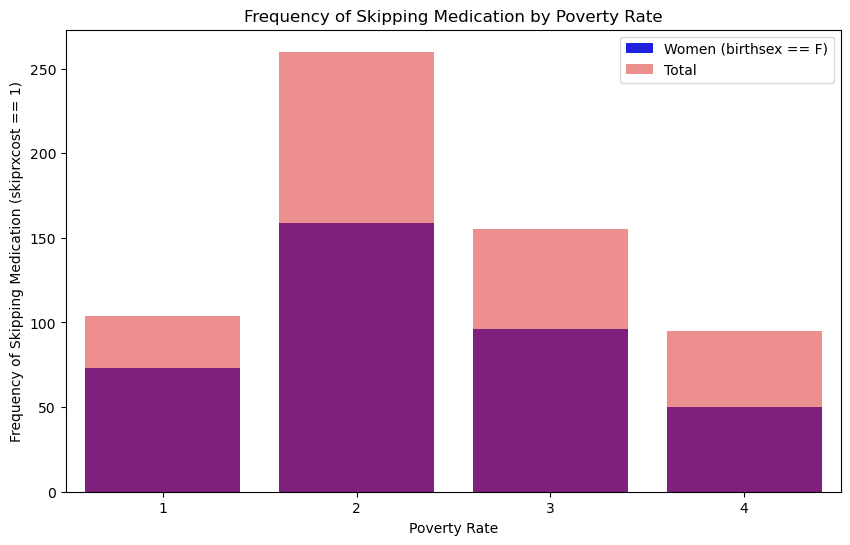

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for skiprxcost == 1 and birthsex == 'F'
skiprxcost_women = chs_df[(chs_df['skiprxcost'] == 1) & (chs_df['birthsex'] == 'F')]

# Group by pov_rate and count the number of skiprxcost == 1 for women
skiprxcost_women_counts = skiprxcost_women.groupby('pov_rate')['skiprxcost'].count()

# Plot the counts for women
plt.figure(figsize=(10, 6))
sns.barplot(x=skiprxcost_women_counts.index, y=skiprxcost_women_counts.values, color='blue', label='Women (birthsex == F)')

# Group by pov_rate and count the total number of skiprxcost == 1
skiprxcost_counts = chs_df[chs_df['skiprxcost'] == 1].groupby('pov_rate')['skiprxcost'].count()

# Plot the counts for total skiprxcost == 1
sns.barplot(x=skiprxcost_counts.index, y=skiprxcost_counts.values, color='red', alpha=0.5, label='Total')

plt.title('Frequency of Skipping Medication by Poverty Rate')
plt.xlabel('Poverty Rate')
plt.ylabel('Frequency of Skipping Medication (skiprxcost == 1)')
#plt.grid()
plt.legend()
plt.show()


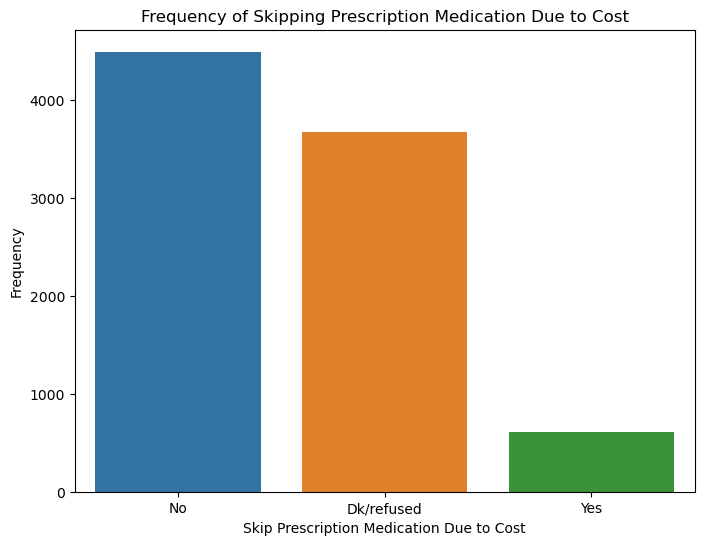

In [86]:
# Plot the frequency of skipping prescription medication due to cost
plt.figure(figsize=(8, 6))
sns.countplot(data=chs_df, x='skiprxcost')
plt.title('Frequency of Skipping Prescription Medication Due to Cost')
plt.xlabel('Skip Prescription Medication Due to Cost')
plt.gca().set_xticklabels(['No','Dk/refused', 'Yes'])

plt.ylabel('Frequency')
plt.show()


### Is there an imbalance in the distribution of birthsex (sex at birth) in the dataset?

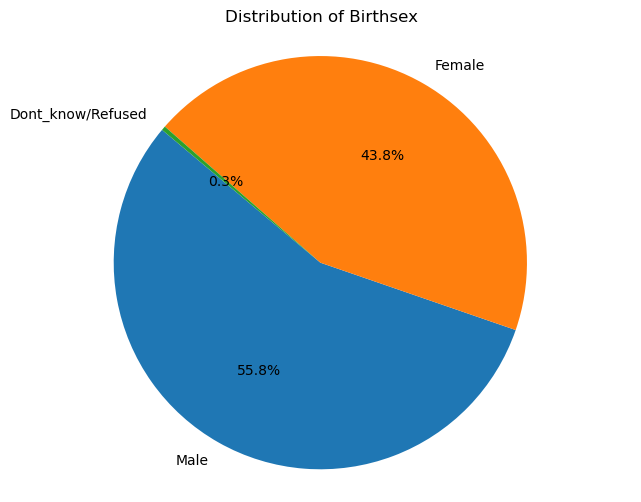

In [87]:
import matplotlib.pyplot as plt

# Define custom labels for birthsex categories
custom_labels = ['Male', 'Female', 'Dont_know/Refused']

# Count the occurrences of each birthsex category
birthsex_counts = chs_df['birthsex'].value_counts()

# Plot a pie chart with custom labels
plt.figure(figsize=(8, 6))
plt.pie(birthsex_counts, labels=custom_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Birthsex')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [88]:
chs_df['avg_soda_perday'].value_counts()

1.0      5412
2.0      2492
3.0       478
4.0       371
99.99      28
Name: avg_soda_perday, dtype: int64

### How does soda consumption vary across different demographic groups such as age, gender, or socioeconomic status? 

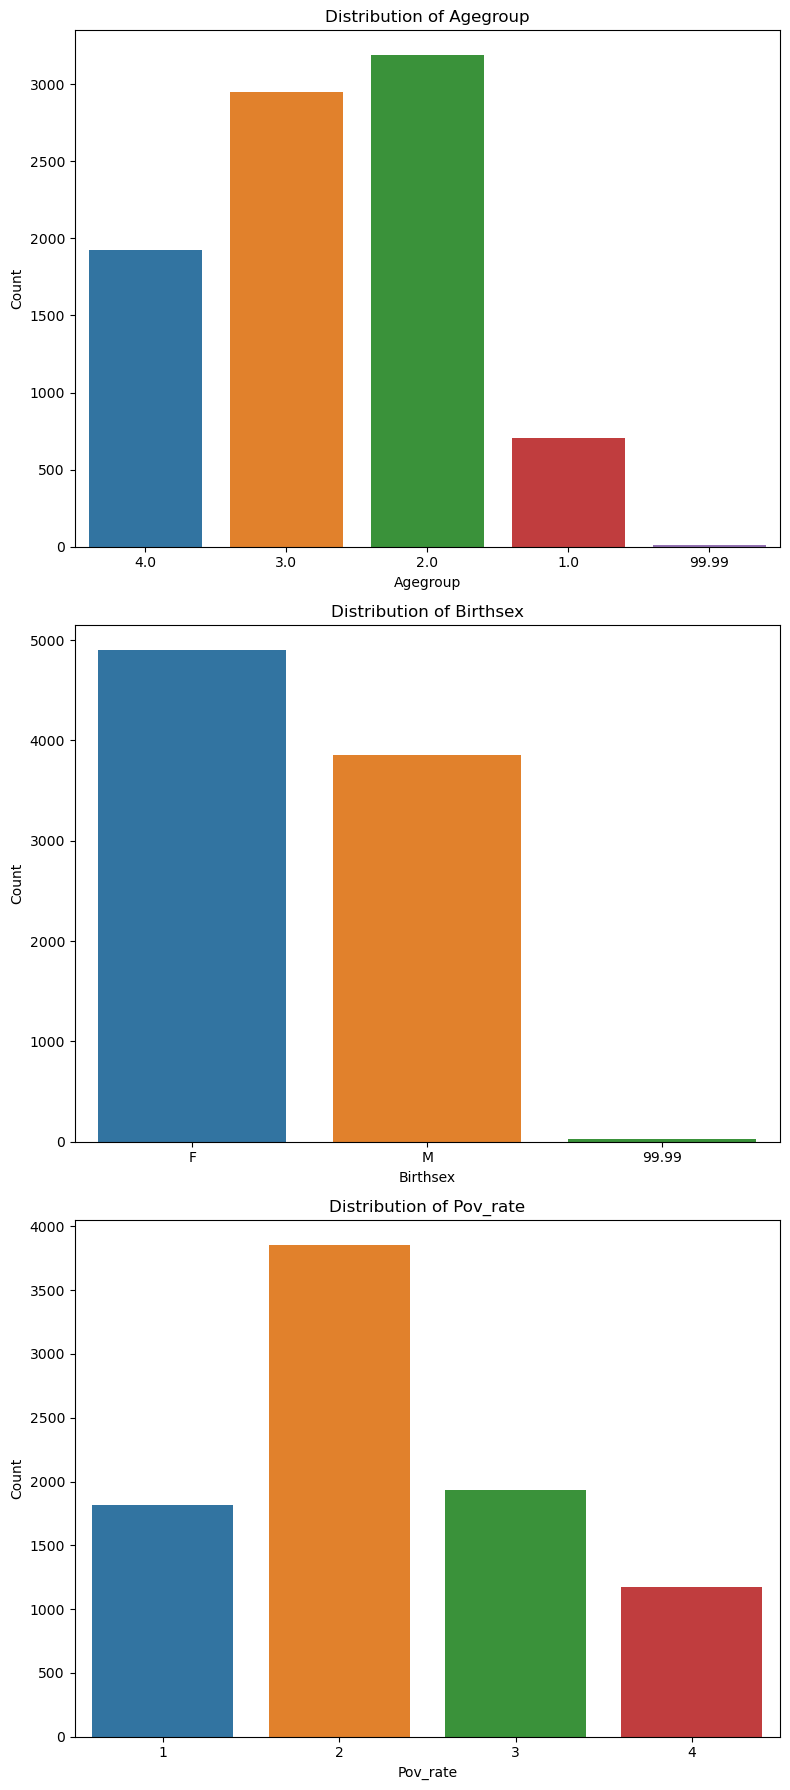

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the demographic variables of interest
demographic_vars = ['agegroup', 'birthsex', 'pov_rate']

# Plot distributions of categorical variables in a grid
fig, axes = plt.subplots(len(demographic_vars), 1, figsize=(8, 6*len(demographic_vars)))

for i, var in enumerate(demographic_vars):
    sns.countplot(data=chs_df, x=var, ax=axes[i])
    axes[i].set_title(f'Distribution of {var.capitalize()}')
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

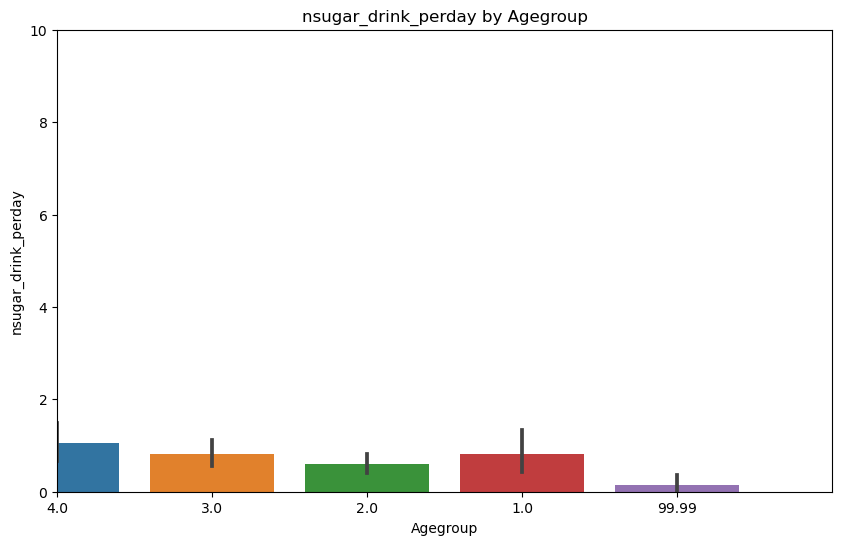

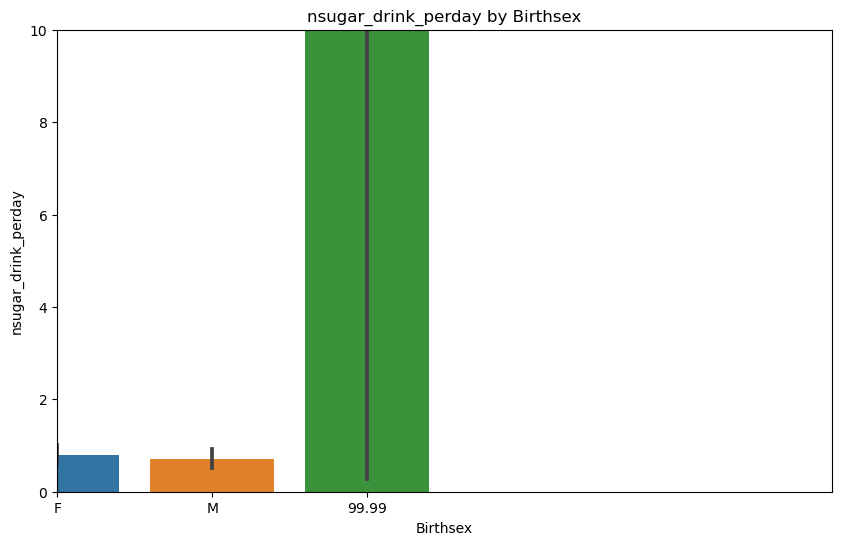

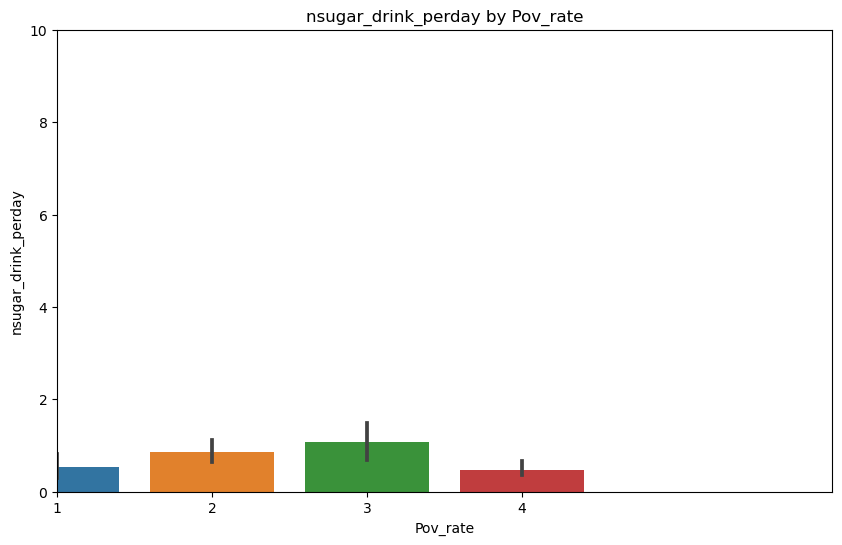

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the demographic variables of interest
demographic_vars = ['agegroup', 'birthsex', 'pov_rate']

# Plot nsugar_drink_perday against different demographic groups using scatter plots
for var in demographic_vars:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=chs_df, x=var, y='nsugar_drink_perday')
    plt.title(f'nsugar_drink_perday by {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('nsugar_drink_perday')
    plt.xlim(0, 5)  # Set x-axis limits to 0-20
    plt.ylim(0, 10)  # Set y-axis limits to 0-20
    plt.show()


### Is there a relationship between BMI (weightall) and the consumption of fruits and vegetables (fruitveg_servings_yest)? 


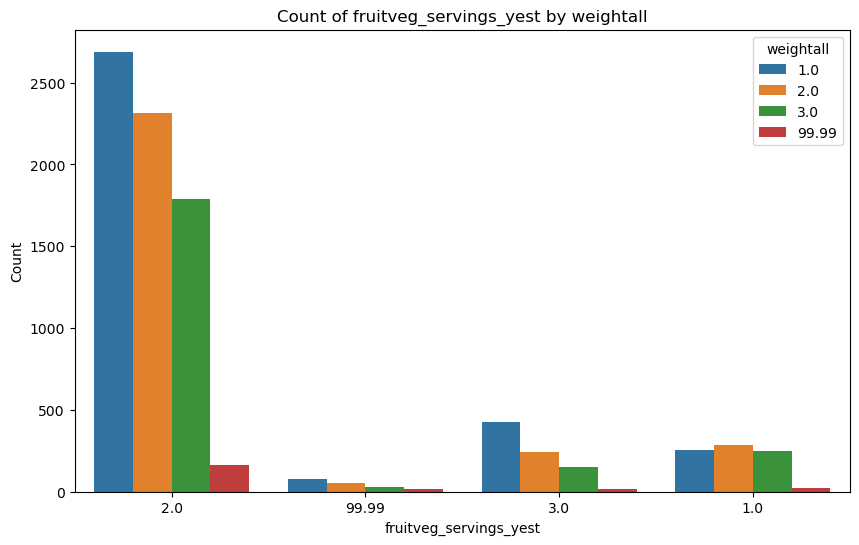

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=chs_df, x='fruitveg_servings_yest', hue='weightall')
plt.title('Count of fruitveg_servings_yest by weightall')
plt.xlabel('fruitveg_servings_yest')
plt.ylabel('Count')
plt.legend(title='weightall')
plt.show()

### How does the frequency of skipping prescription medication (skiprxcost) vary across different levels of poverty rate (pov_rate)? 

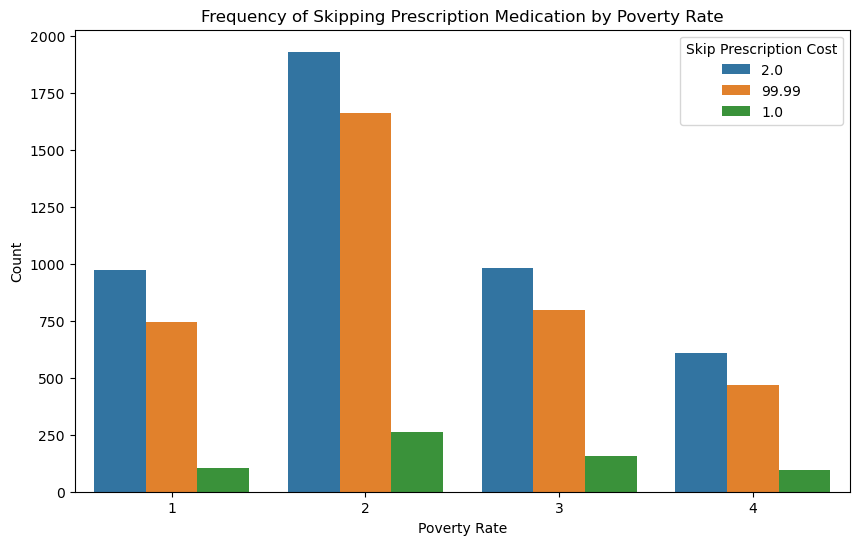

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=chs_df, x='pov_rate', hue='skiprxcost')
plt.title('Frequency of Skipping Prescription Medication by Poverty Rate')
plt.xlabel('Poverty Rate')
plt.ylabel('Count')
plt.legend(title='Skip Prescription Cost')
plt.show()


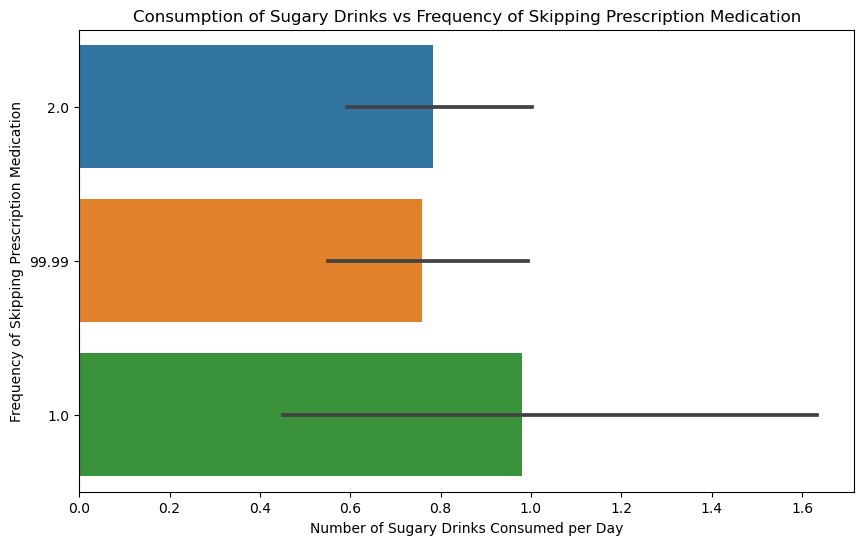

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.barplot(data=chs_df, x='nsugar_drink_perday', y='skiprxcost')
plt.title('Consumption of Sugary Drinks vs Frequency of Skipping Prescription Medication')
plt.xlabel('Number of Sugary Drinks Consumed per Day')
plt.ylabel('Frequency of Skipping Prescription Medication')
plt.show()


In [134]:
chs_df['soda+sweet_perday'] = chs_df['soda+sweet_perday'].astype(float)

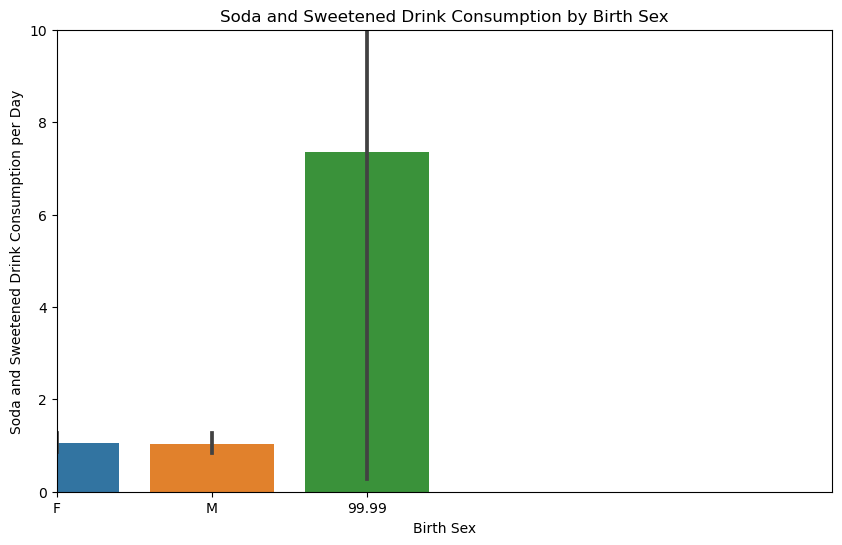

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot soda+sweet_perday against birthsex using a box plot
plt.figure(figsize=(10, 6))
sns.barplot(data=chs_df, x='birthsex', y='soda+sweet_perday')
plt.title('Soda and Sweetened Drink Consumption by Birth Sex')
plt.xlabel('Birth Sex')
plt.ylabel('Soda and Sweetened Drink Consumption per Day')
plt.xlim(0, 5)  # Set x-axis limits to 0-20
plt.ylim(0, 10)  # Set y-axis limits to 0-20
plt.show()

plt.show()



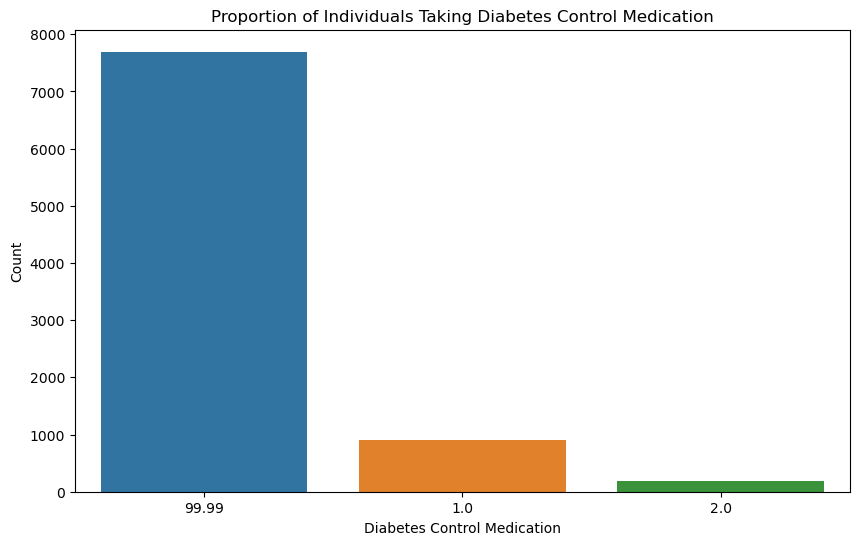

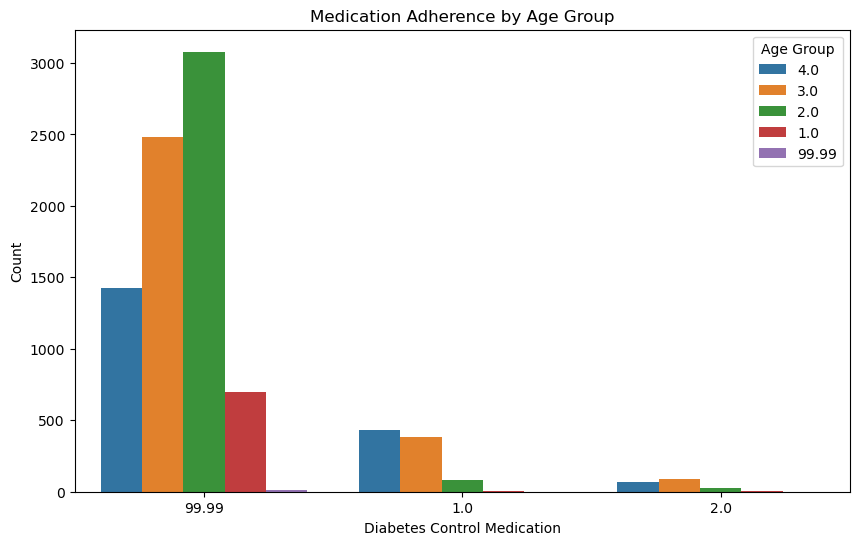

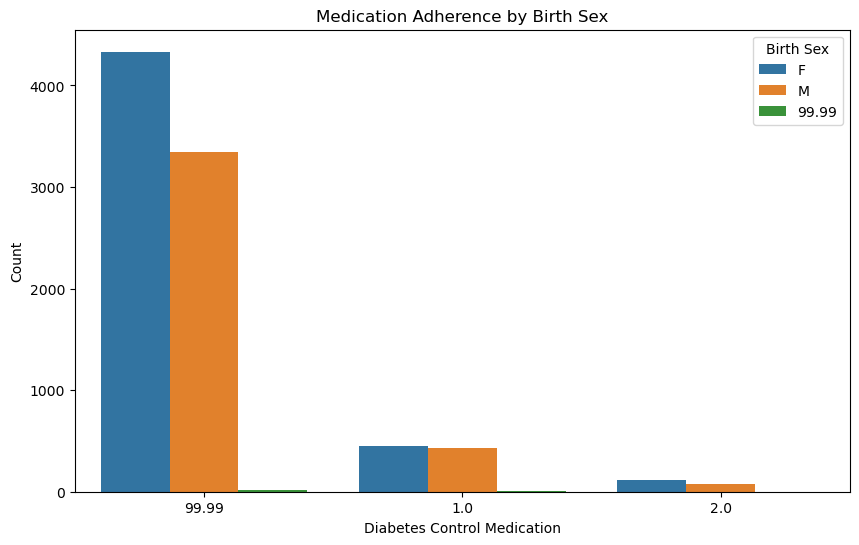

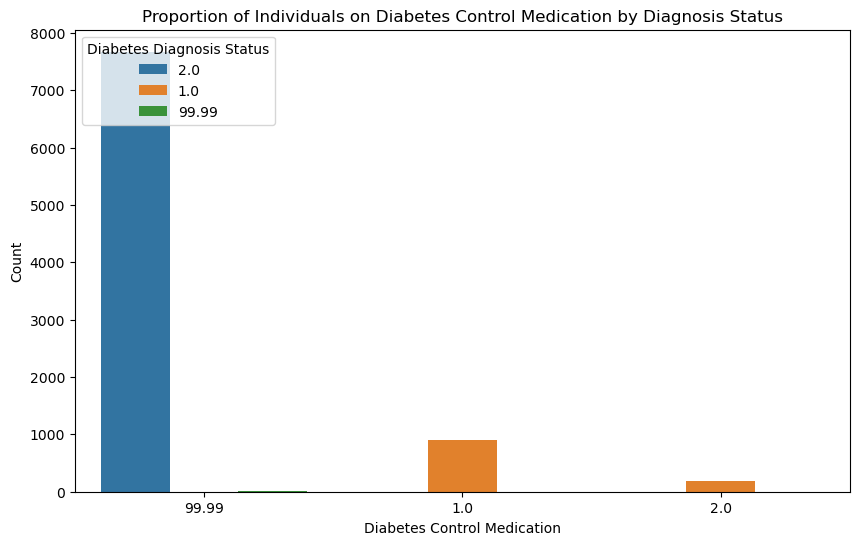

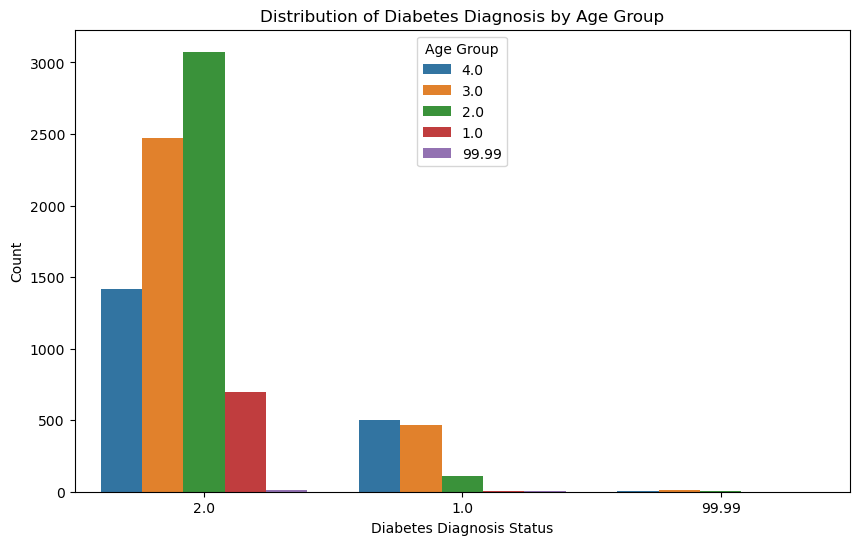

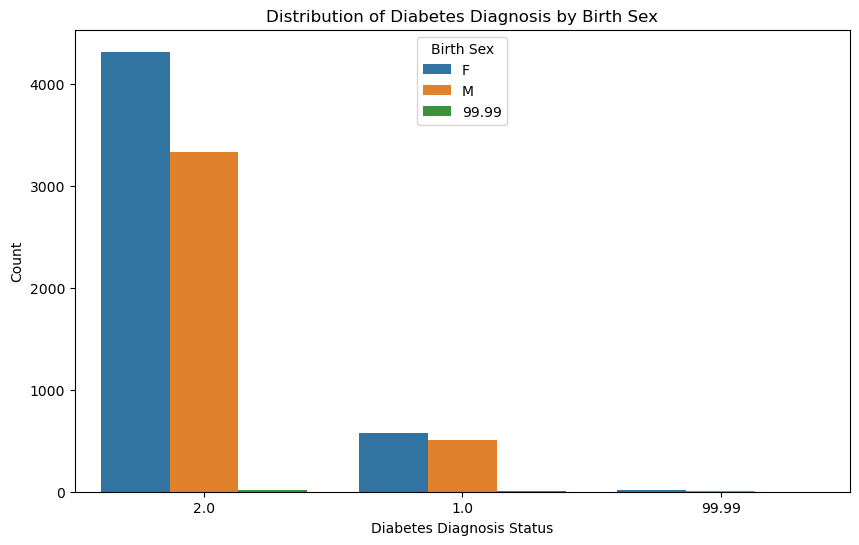

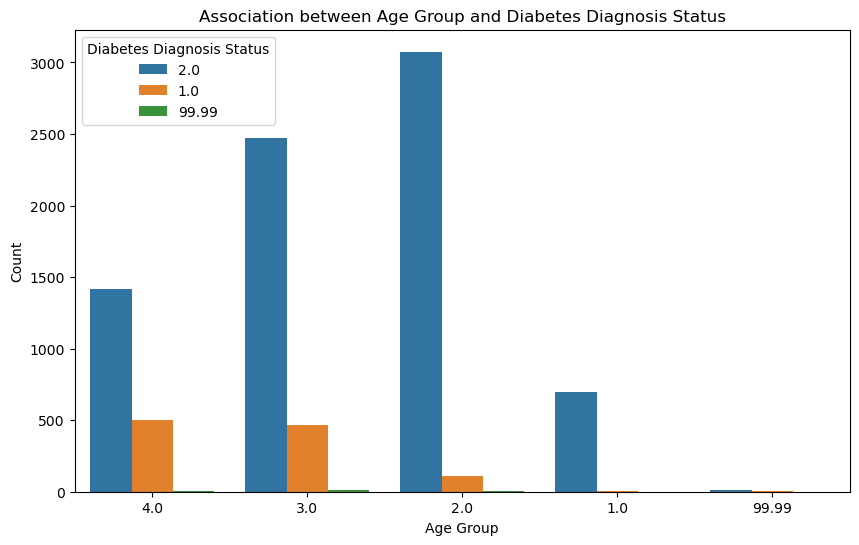

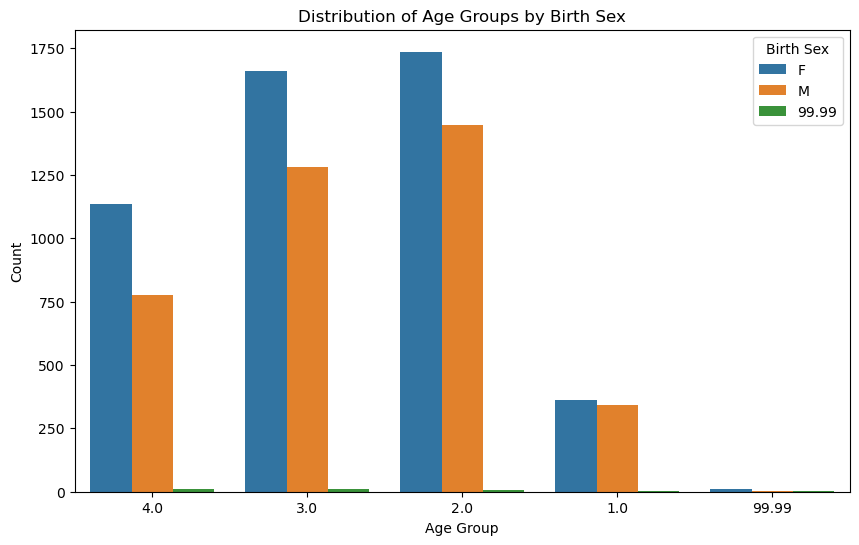

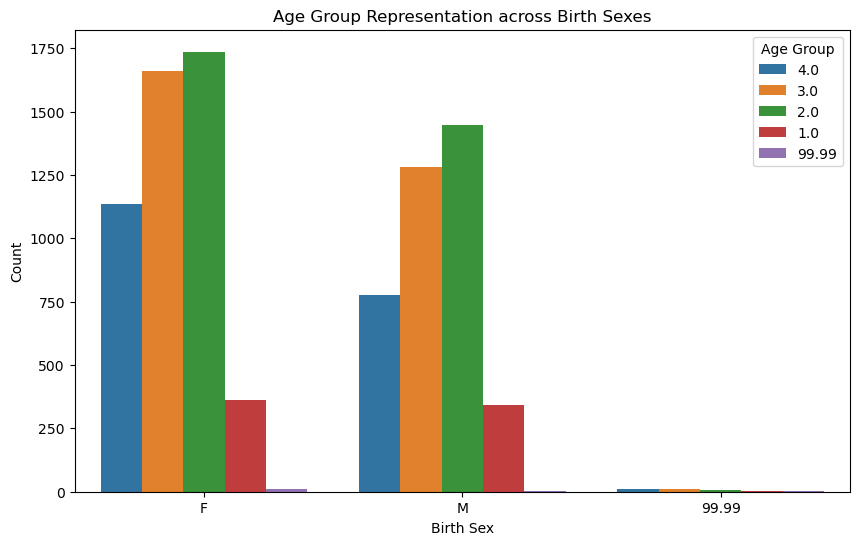

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# Medication Adherence and Diabetes Control
# Proportion of individuals with diabetes taking diabetes control medication
plt.figure(figsize=(10, 6))
sns.countplot(data=chs_df, x='diabcntrlmeds')
plt.title('Proportion of Individuals Taking Diabetes Control Medication')
plt.xlabel('Diabetes Control Medication')
plt.ylabel('Count')
plt.show()

# Medication adherence between different demographic groups
plt.figure(figsize=(10, 6))
sns.countplot(data=chs_df, x='diabcntrlmeds', hue='agegroup')
plt.title('Medication Adherence by Age Group')
plt.xlabel('Diabetes Control Medication')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=chs_df, x='diabcntrlmeds', hue='birthsex')
plt.title('Medication Adherence by Birth Sex')
plt.xlabel('Diabetes Control Medication')
plt.ylabel('Count')
plt.legend(title='Birth Sex')
plt.show()

# Proportion of individuals on diabetes control medication based on diabetes diagnosis status
plt.figure(figsize=(10, 6))
sns.countplot(data=chs_df, x='diabcntrlmeds', hue='diabetes20')
plt.title('Proportion of Individuals on Diabetes Control Medication by Diagnosis Status')
plt.xlabel('Diabetes Control Medication')
plt.ylabel('Count')
plt.legend(title='Diabetes Diagnosis Status')
plt.show()

# Diabetes Diagnosis and Demographics
# Distribution of diabetes diagnosis among different demographic groups
plt.figure(figsize=(10, 6))
sns.countplot(data=chs_df, x='diabetes20', hue='agegroup')
plt.title('Distribution of Diabetes Diagnosis by Age Group')
plt.xlabel('Diabetes Diagnosis Status')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=chs_df, x='diabetes20', hue='birthsex')
plt.title('Distribution of Diabetes Diagnosis by Birth Sex')
plt.xlabel('Diabetes Diagnosis Status')
plt.ylabel('Count')
plt.legend(title='Birth Sex')
plt.show()

# Association between age group and diabetes diagnosis status
plt.figure(figsize=(10, 6))
sns.countplot(data=chs_df, x='agegroup', hue='diabetes20')
plt.title('Association between Age Group and Diabetes Diagnosis Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diabetes Diagnosis Status')
plt.show()

# Demographic Characteristics
# Distribution of age groups within different birth sexes
plt.figure(figsize=(10, 6))
sns.countplot(data=chs_df, x='agegroup', hue='birthsex')
plt.title('Distribution of Age Groups by Birth Sex')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Birth Sex')
plt.show()

# Age group representation across birth sexes
plt.figure(figsize=(10, 6))
sns.countplot(data=chs_df, x='birthsex', hue='agegroup')
plt.title('Age Group Representation across Birth Sexes')
plt.xlabel('Birth Sex')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()

# Correlation between demographic variables
# Since all variables are categorical, we can't directly visualize correlation
# However, we can compute contingency tables and conduct chi-square tests to assess association


In [177]:
chs_df[chs_df['diabetes20'] == 1.0]

,cid,strata,survey,birthsex,weightall,pov_rate,fruitveg_servings_yest,avg_soda_perday,two_plus_soda,nsugar_drink_perday,soda+sweet_perday,soda+sweet_yn,skiprxcost,ageatdiabetes,diabcntrlmeds,diabetes20,agegroup
1,2100002,20201304,21,F,1.0,3,2.0,1.0,2.0,0.0,0.285714,2.0,2.0,3.0,1.0,1.0,4.0
3,2100004,20201314,21,F,1.0,2,2.0,2.0,2.0,0.0,0.175915,2.0,99.99,1.0,1.0,1.0,2.0
5,2100006,20201210,21,M,3.0,2,2.0,1.0,2.0,0.0,0.132231,2.0,1.0,3.0,1.0,1.0,4.0
8,2100009,20201205,21,F,3.0,4,99.99,3.0,2.0,0.0,1.285714,1.0,2.0,99.99,1.0,1.0,4.0
11,2100012,20201212,21,M,2.0,2,2.0,1.0,2.0,0.0,0.000000,2.0,2.0,3.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,2116931,20204000,21,M,1.0,2,2.0,1.0,2.0,0.0,0.000000,2.0,2.0,2.0,1.0,1.0,3.0
8743,2116943,20204000,21,M,1.0,2,2.0,1.0,2.0,0.0,0.000000,2.0,2.0,2.0,1.0,1.0,2.0
8750,2116950,20204000,21,M,2.0,2,2.0,1.0,2.0,0.0,0.000000,2.0,2.0,3.0,1.0,1.0,3.0
8763,2116963,20204000,21,M,2.0,2,2.0,1.0,2.0,0.0,0.000000,2.0,2.0,3.0,1.0,1.0,3.0


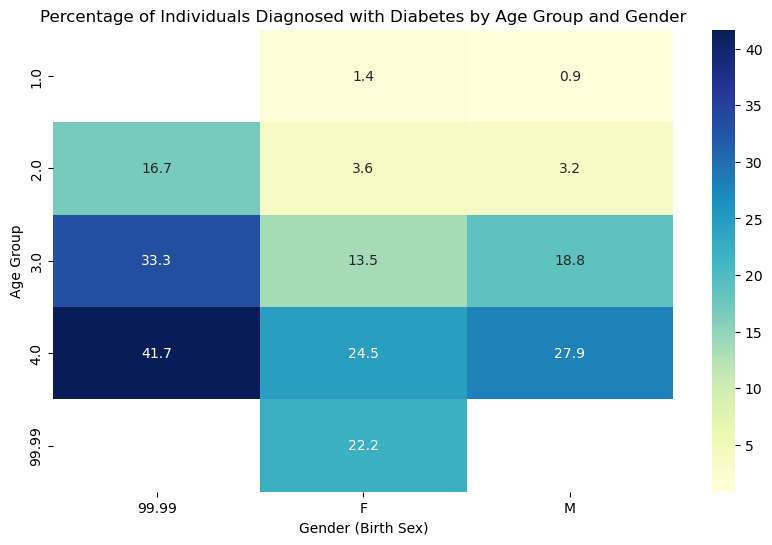

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by age group and gender, and count the number of diagnosed individuals
diabetes_counts = chs_df[chs_df['diabetes20'] == 1.0].groupby(['agegroup', 'birthsex']).size().reset_index(name='diabetes_count')

# Count the total number of individuals in each age group and gender category
total_counts = chs_df.groupby(['agegroup', 'birthsex']).size().reset_index(name='total_count')

# Merge the counts dataframes
merged_df = diabetes_counts.merge(total_counts, on=['agegroup', 'birthsex'])

# Calculate the percentage of diagnosed individuals
merged_df['percentage'] = (merged_df['diabetes_count'] / merged_df['total_count']) * 100

# Pivot the dataframe for plotting
pivot_df = merged_df.pivot(index='agegroup', columns='birthsex', values='percentage')

# Plot the percentages
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", fmt=".1f", cbar=True)
plt.title('Percentage of Individuals Diagnosed with Diabetes by Age Group and Gender')
plt.xlabel('Gender (Birth Sex)')
plt.ylabel('Age Group')
plt.show()


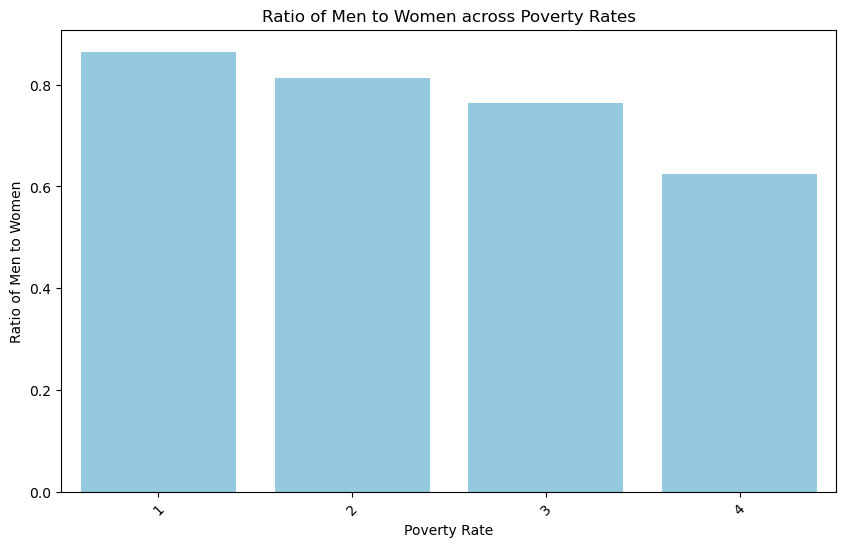

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by birthsex and poverty rate, and count the number of individuals
count_by_sex_poverty = chs_df.groupby(['birthsex', 'pov_rate']).size().reset_index(name='count')

# Pivot the dataframe to get counts by birthsex and poverty rate
pivot_count_by_sex_poverty = count_by_sex_poverty.pivot(index='pov_rate', columns='birthsex', values='count')

# Calculate the total count for each poverty rate
total_count_by_poverty = pivot_count_by_sex_poverty.sum(axis=1)

# Calculate the ratio of men to women for each poverty rate
ratio_by_poverty = pivot_count_by_sex_poverty['M'] / pivot_count_by_sex_poverty['F']

# Plot the ratio of men to women across poverty rates
plt.figure(figsize=(10, 6))
sns.barplot(x=ratio_by_poverty.index, y=ratio_by_poverty.values, color='skyblue')
plt.title('Ratio of Men to Women across Poverty Rates')
plt.xlabel('Poverty Rate')
plt.ylabel('Ratio of Men to Women')
plt.xticks(rotation=45)
plt.show()

Questions:
1. What is the distribution of BMI (weightall) in the dataset? Are there more people in the dataset with normal weight, overweight, or obesity?

2. How does the distribution of fruit and vegetable servings (fruitveg_servings_yest) vary across different poverty rate levels (pov_rate)?

3. What is the frequency of skipping prescription medication due to cost (skiprxcost) in the dataset?

4. Is there an imbalance in the distribution of birthsex (sex at birth) in the dataset?

5. What is the number of sodas consumed per day (avg_soda_perday) among different groups based on soda and sweetened drink consumption (soda+sweet_yn)?

6. Is there a relationship between BMI (weightall) and the consumption of fruits and vegetables (fruitveg_servings_yest)? 

7. How does the frequency of skipping prescription medication (skiprxcost) vary across different levels of poverty rate (pov_rate)? Plot skiprxcost against poverty rate.

8. Is there a correlation between the consumption of sugary drinks (nsugar_drink_perday) and the frequency of skipping prescription medication (skiprxcost)? Plot nsugar_drink_perday against skiprxcost.

9. How does the consumption of sodas and sweetened drinks (soda+sweet_perday) differ between individuals with different birthsex (sex at birth)? Plot soda+sweet_perday against birthsex.

10. What is the relationship between diabetes, age group, men and women?

Answers:

1. Normal/Under weight and overweight people are almost balanced in the dataset with the prior having 39% and the latter having 33%. The percentage of obese people consists of 25%. 

2. The distribution of veggie and fruit servings were 5+ for almost none to medium rates of poverty, ie., people in high and very high levels of poverty did not consume 5+ fruit per day. Low to medium levels of poverty had an equal number of people who had no servings of fruit and veggie per day and 1-4 servings of fruit/veggie per day. Apart from this, the data did not show much. 

3,7. People in medium levels of poverty have mostly responded yes to skipping medicine due to cost, and around 50% of these are women. Women and men are equally doing this. People in high levels have said yes to skipping medicine because of cost more than people in low levels of poverty. 55% women and 45% men in high levels of poverty have said yes to skipping medicine. 68% of women and 32% of men in the low poverty category have admitted to skipping medicine due to cost in the past 12 months.

4. 55.8% of the dataset is male and 45.2% is female. The dataset is leaning towards male population. 

5. People above 65 years consume the highest number of sodas per day. People between ages 25-45 and 45-64 have equally consumed lesser amounts of soda. People below 25 have consumed the least amount of sodas per day. Women tend t consume more sodas than men. People in high levels of poverty have consumed most sdas. 

6. Most people consumed 1-4 servings of fruit/veggies per day. People who've had 1-4 servings of fruit/veggies per day mostly are under/normal weight, shortly followed by over weight. People who had no fruit/veggies per day almost equal levels of weight, dominated slightly by Overweight people. People who had 5+ servings of fruit had numbers similar to people having 1-4 servings of fruit/veggies. 

8. Frequency of skipping medication due to cost is high amng people who consume an avg of 1 soda per day. It is lower in people who consume less than an avg of 1 sda per day.

9. When you consider sodas + sweet bevrages, women and men are almost equal consumers. 

10. Around 30% of men aged 65+ have been diagnosed with diabetes. Less than 2% of women in new york aged 18-24 have been diagnosed with diabetes. People aged 45+ are more prone to diabetes due to more soda consumption, with men being prone to it more than women. 

11. Male to female ratio is high is areas with less poverty. As the poverty rate increase, male to female ratio decreases. So the poorer a neighborhood is, the less number of males in it. 